# Planar Data Classification With One Hidden Layer


Package Imports

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from testCases import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

%matplotlib inline

Load Dataset

In [63]:
X, Y = load_planar_dataset()

In [66]:
X

array([[ 1.20444229e+00,  1.58709904e-01,  9.52471960e-02,
         3.49178475e-01,  6.94150378e-01,  1.62065038e+00,
         1.53856225e+00,  3.63085641e-02,  4.74591109e-01,
         1.65695828e-01,  1.66446249e+00,  8.40285720e-01,
         2.61695163e-01,  2.31614896e-01,  1.58013020e+00,
         6.35509950e-03,  6.80610419e-01,  1.21400432e-01,
         1.13281261e+00,  1.61505892e+00,  1.66454441e-01,
         1.72438241e+00,  1.88667246e+00,  1.72327227e+00,
         1.54661332e+00,  9.84590400e-01,  1.45313345e+00,
         7.49043388e-01,  1.45048341e+00,  1.64287865e+00,
         1.28141487e+00,  1.59574104e+00,  1.46298294e+00,
         1.46629048e+00,  1.54348961e+00,  1.57013416e+00,
         1.22995404e+00,  1.31142345e+00, -1.99364553e+00,
         3.94564752e-01,  1.51715449e+00,  1.69169139e+00,
         1.74186686e+00, -2.91373382e+00,  7.52150898e-01,
         1.68537303e+00,  3.71160238e-01, -3.73033884e+00,
         3.52484080e-01, -1.48694206e+00, -7.45290416e-0

Graph view of our problem

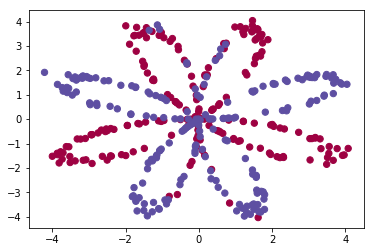

In [65]:
plt.scatter(X[0, :], X[1, :], c=Y.reshape(400,), s=40, cmap=plt.cm.Spectral);

In [69]:

shape_X = X.shape
shape_Y = Y.shape
m = Y.shape[1]


print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))
print ('m = %d training examples' % (m))

The shape of X is: (2, 400)
The shape of Y is: (1, 400)
m = 400 training examples


The inefficient Logistic Regression not suitable for our dataset

In [70]:
clf = sklearn.linear_model.LogisticRegressionCV();
clf.fit(X.T, Y.T);

C:\Users\Abhay\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Abhay\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Accuracy of logistic regression: 47 % (percentage of correctly labelled datapoints)


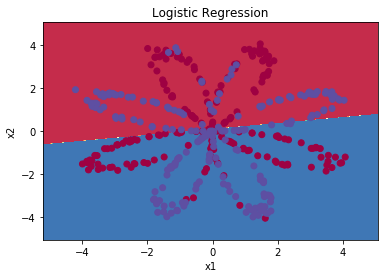

In [72]:
plot_decision_boundary(lambda x: clf.predict(x), X, Y.reshape(400,))
plt.title("Logistic Regression")

LR_predictions = clf.predict(X.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y, LR_predictions) + np.dot(1 - Y,1 - LR_predictions)) / float(Y.size) * 100) +
       '% ' + "(percentage of correctly labelled datapoints)")

Details about the hidden layer

In [73]:

def layer_sizes(X, Y):

    n_x = X.shape[0]
    n_h = 4
    n_y = Y.shape[0]
    return (n_x, n_h, n_y)

In [75]:
X_assess, Y_assess = layer_sizes_test_case()
(n_x, n_h, n_y) = layer_sizes(X_assess, Y_assess)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the hidden layer is: n_h = " + str(n_h))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 5
The size of the hidden layer is: n_h = 4
The size of the output layer is: n_y = 2


Initialize parameters for neural network

In [77]:
def initialize_parameters(n_x, n_h, n_y):
    
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros(shape=(n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros(shape=(n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [79]:
n_x, n_h, n_y = initialize_parameters_test_case()

parameters = initialize_parameters(n_x, n_h, n_y)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00845206 -0.00671246]
 [-0.00012665 -0.0111731 ]
 [ 0.00234416  0.01659802]
 [ 0.00742044 -0.00191836]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.00887629 -0.00747158  0.01692455  0.00050808]]
b2 = [[0.]]


The forward propagation for neural network

In [80]:

def forward_propagation(X, parameters):


    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [82]:
X_assess, parameters = forward_propagation_test_case()

A2, cache = forward_propagation(X_assess, parameters)

print(np.mean(cache['Z1']), np.mean(cache['A1']), np.mean(cache['Z2']), np.mean(cache['A2']))

-0.0004997557777419902 -0.000496963353231779 0.00043818745095914653 0.500109546852431


Cost computation:

In [83]:
def compute_cost(A2, Y, parameters):

    
    m = Y.shape[1]

    W1 = parameters['W1']
    W2 = parameters['W2']
    
    logprobs = np.multiply(np.log(A2), Y) + np.multiply((1 - Y), np.log(1 - A2))
    cost = - np.sum(logprobs) / m
    
    cost = np.squeeze(cost)     
                                    
    return cost

In [85]:
A2, Y_assess, parameters = compute_cost_test_case()

print("cost = " + str(compute_cost(A2, Y_assess, parameters)))

cost = 0.6929198937761266


Backward propagation for our neural network

In [86]:

def backward_propagation(parameters, cache, X, Y):

    m = X.shape[1]
    

    W1 = parameters['W1']
    W2 = parameters['W2']
        

    A1 = cache['A1']
    A2 = cache['A2']
    

    dZ2= A2 - Y
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(A1, 2))
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [104]:
parameters, cache, X_assess, Y_assess = backward_propagation_test_case()

grads = backward_propagation(parameters, cache, X_assess, Y_assess)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dW2 = "+ str(grads["dW2"]))
print ("db2 = "+ str(grads["db2"]))

dW1 = [[ 0.01018708 -0.00708701]
 [ 0.00873447 -0.0060768 ]
 [-0.00530847  0.00369379]
 [-0.02206365  0.01535126]]
db1 = [[-0.00069728]
 [-0.00060606]
 [ 0.000364  ]
 [ 0.00151207]]
dW2 = [[ 0.00363613  0.03153604  0.01162914 -0.01318316]]
db2 = [[0.06589489]]





Update Parameters

In [88]:

def update_parameters(parameters, grads, learning_rate=1.2):

    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    

    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [90]:
parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00643025  0.01936718]
 [-0.02410458  0.03978052]
 [-0.01653973 -0.02096177]
 [ 0.01046864 -0.05990141]]
b1 = [[-1.02420756e-06]
 [ 1.27373948e-05]
 [ 8.32996807e-07]
 [-3.20136836e-06]]
W2 = [[-0.01041081 -0.04463285  0.01758031  0.04747113]]
b2 = [[0.00010457]]




Constructing the final model using above functions

In [91]:

def nn_model(X, Y, n_h, num_iterations=10000, print_cost=False):

    
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    

    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    

    for i in range(0, num_iterations):
         

        A2, cache = forward_propagation(X, parameters)
        
        cost = compute_cost(A2, Y, parameters)
 
        grads = backward_propagation(parameters, cache, X, Y)
 
        parameters = update_parameters(parameters, grads)        

    if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" % (i, cost))

    return parameters

In [93]:
X_assess, Y_assess = nn_model_test_case()

parameters = nn_model(X_assess, Y_assess, 4, num_iterations=10000, print_cost=False)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

C:\Users\Abhay\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


W1 = [[ 7.53782334 -1.20760619]
 [ 4.19448432 -5.32528476]
 [-7.53783022  1.2076268 ]
 [ 4.02937141 -5.48895856]]
b1 = [[-3.81016426]
 [-2.33001228]
 [ 3.81022645]
 [-2.27019191]]
W2 = [[ 6007.21077186  6033.5623331  -6007.43196909  6031.84490087]]
b2 = [[-52.75631341]]




Predictions from our model

In [96]:
def predict(parameters, X):

    A2, cache = forward_propagation(X, parameters)
    predictions = np.round(A2)
    
    return predictions

In [97]:
parameters, X_assess = predict_test_case()

predictions = predict(parameters, X_assess)
print("predictions mean = " + str(np.mean(predictions)))

predictions mean = 0.6666666666666666


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

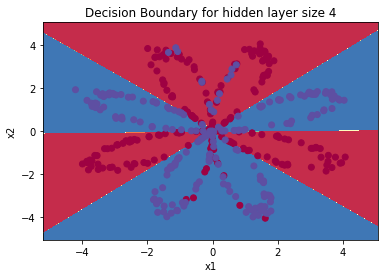

In [99]:
parameters = nn_model(X, Y, n_h = 4, num_iterations=10000, print_cost=True)

plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y.reshape(400,))
plt.title("Decision Boundary for hidden layer size " + str(4))


Printing Accuracy

In [100]:
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size) * 100) + '%')

Accuracy: 90%




Accuracy for different number of hidden units

Accuracy for 1 hidden units: 67.5 %
Accuracy for 2 hidden units: 67.25 %
Accuracy for 3 hidden units: 90.75 %
Accuracy for 4 hidden units: 90.5 %
Accuracy for 5 hidden units: 91.25 %
Accuracy for 20 hidden units: 91.0 %
Accuracy for 50 hidden units: 90.25 %


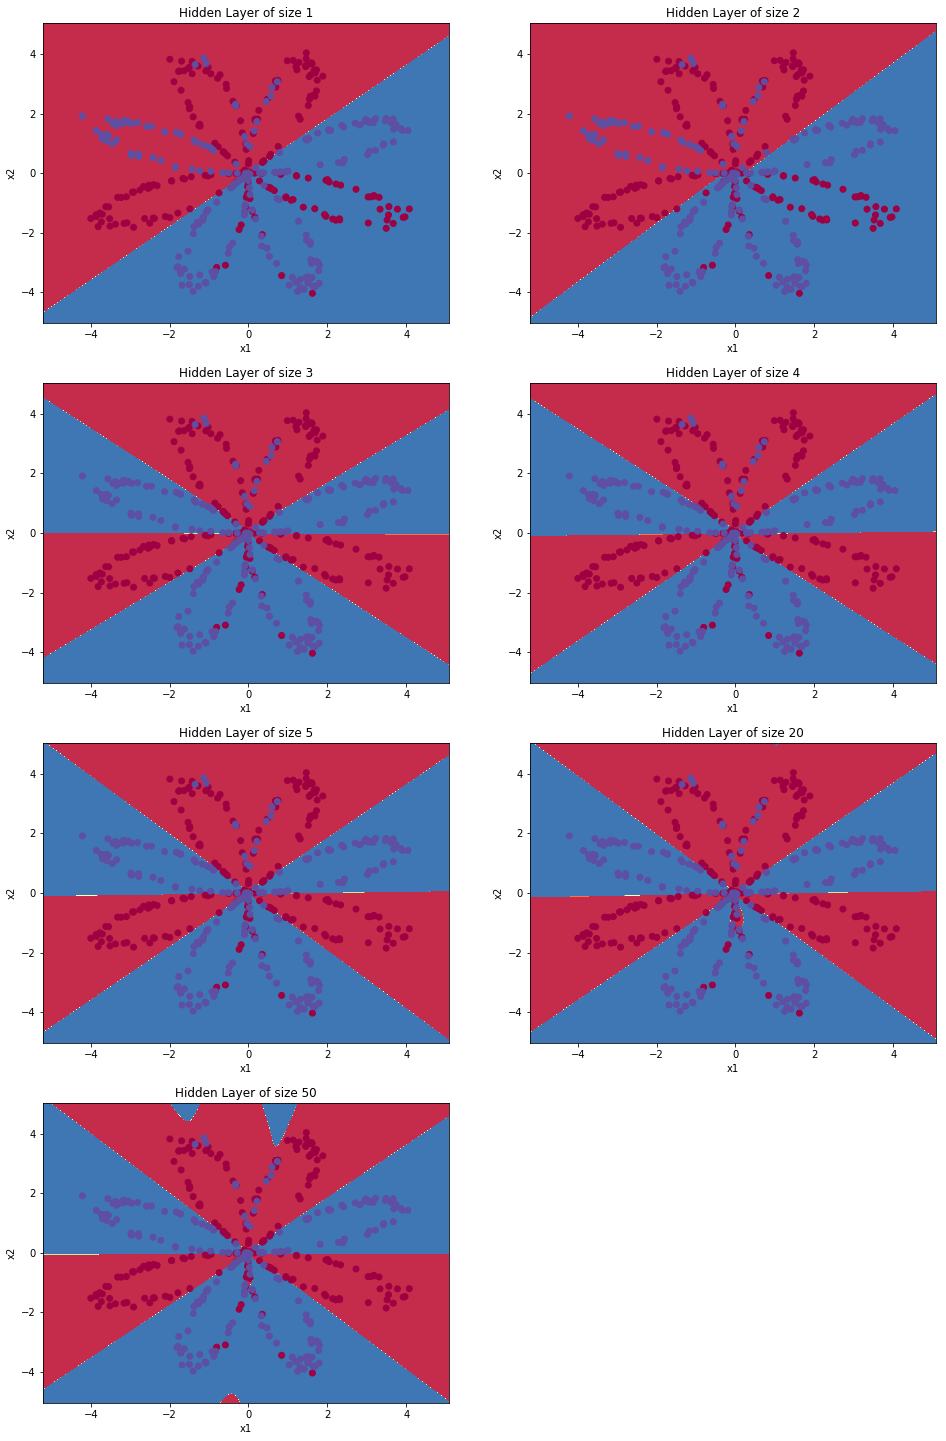

In [102]:
plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i + 1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = nn_model(X, Y, n_h, num_iterations=5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y.reshape(400,))
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size) * 100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))